<a href="https://colab.research.google.com/github/RajivShresth/scikit-learn-videos/blob/master/Deposit_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
%matplotlib inline  

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [35]:
data = pd.read_excel("/content/drive/My Drive/Datasets for google colab/MacroEconomicData.xlsx")
data.head()

,Year,Unemployment Rate,Inflation (%),BOP (In Bn),Remittance (In Bn),Import (In Bn),Export (In Bn),Trade Deficit,Capital Expenditure(In Bn),Total Risk Assets (In Bn),Total Deposits (In Bn)
0,2019,1.25,4.50,-67.40,829.384134,1418.000000,97.100000,-1320.900000,238.35600,2910.51100,3354.42800
1,2018,1.26,4.15,0.96,692.813401,1243.000000,81.000000,-1162.000000,270.71370,2419.84200,2836.93000
2,2017,3.20,4.45,82.00,661.183854,984.302948,73.036244,-911.266704,208.74843,1976.88000,2384.80700
3,2016,3.40,9.93,188.90,672.993567,774.712277,70.254165,-704.458112,123.25145,1669.20304,2107.50269
4,2015,3.20,7.21,145.00,588.865015,786.200000,85.200000,-701.000000,88.84351,1416.47841,1787.95925


In [36]:
data.shape

(25, 11)

In [37]:
data.isnull().sum()

Year                          0
Unemployment Rate             0
Inflation (%)                 0
BOP (In Bn)                   0
Remittance (In Bn)            0
Import (In Bn)                0
Export (In Bn)                0
Trade Deficit                 0
Capital Expenditure(In Bn)    0
Total Risk Assets (In Bn)     0
Total Deposits (In Bn)        0
dtype: int64

In [38]:
data.tail()

,Year,Unemployment Rate,Inflation (%),BOP (In Bn),Remittance (In Bn),Import (In Bn),Export (In Bn),Trade Deficit,Capital Expenditure(In Bn),Total Risk Assets (In Bn),Total Deposits (In Bn)
20,1999,1.9,11.38,9.80,6.750490,87.5253,35.6763,-51.8490,22.9921,90.1244,136.1079
21,1998,3.1,8.33,11.00,4.945806,89.0020,27.5135,-61.4885,28.9439,74.8756,109.5537
22,1997,3.8,8.10,3.20,4.416013,93.5534,22.6365,-70.9169,26.5456,0.0000,0.0000
23,1996,4.5,7.18,-1.08,5.682267,74.4545,19.8811,-54.5734,24.9805,0.0000,0.0000
24,1995,3.2,7.68,-0.30,5.011852,63.6795,17.6392,-46.0403,19.7949,0.0000,0.0000


In [0]:
data.drop([22,23,24], inplace = True)

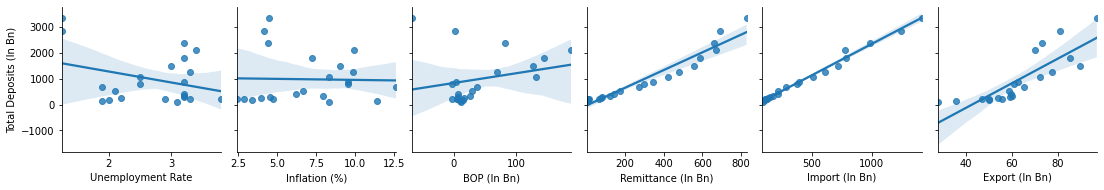

In [41]:
%matplotlib inline
sns.pairplot(data, x_vars =['Unemployment Rate','Inflation (%)','BOP (In Bn)','Remittance (In Bn)','Import (In Bn)','Export (In Bn)'], y_vars = 'Total Deposits (In Bn)', height =2.5,
             kind = 'reg')

In [40]:
data.tail()

,Year,Unemployment Rate,Inflation (%),BOP (In Bn),Remittance (In Bn),Import (In Bn),Export (In Bn),Trade Deficit,Capital Expenditure(In Bn),Total Risk Assets (In Bn),Total Deposits (In Bn)
17,2002,2.9,2.90,-3.30,14.698515,107.3890,46.9448,-60.4442,23.0956,148.2907,205.1353
18,2001,3.8,2.44,5.22,11.149819,115.6872,55.6541,-60.0331,28.3072,124.0489,197.3256
19,2000,2.0,3.39,14.44,8.346278,108.5049,49.8227,-58.6822,25.4807,106.9960,165.9819
20,1999,1.9,11.38,9.80,6.750490,87.5253,35.6763,-51.8490,22.9921,90.1244,136.1079
21,1998,3.1,8.33,11.00,4.945806,89.0020,27.5135,-61.4885,28.9439,74.8756,109.5537


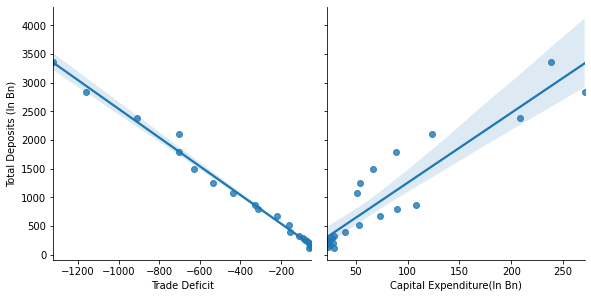

In [43]:
sns.pairplot(data, x_vars = ['Trade Deficit','Capital Expenditure(In Bn)'], y_vars ='Total Deposits (In Bn)', height = 4, kind = 'reg')

In [45]:
feature_cols = ['Remittance (In Bn)','Import (In Bn)']
X = data[feature_cols]
X.head()

,Remittance (In Bn),Import (In Bn)
0,829.384134,1418.000000
1,692.813401,1243.000000
2,661.183854,984.302948
3,672.993567,774.712277
4,588.865015,786.200000


In [47]:
y = data['Total Deposits (In Bn)']
y.head()

0    3354.42800
1    2836.93000
2    2384.80700
3    2107.50269
4    1787.95925
Name: Total Deposits (In Bn), dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 2)
(16,)
(6, 2)
(6,)


In [57]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(linreg.intercept_)
print(linreg.coef_)

-76.3777571516132
[-0.2161608   2.51546926]


In [61]:
y_pred = linreg.predict(X_test)
print(y_pred)
print(y_test)

[ 194.75884565  221.7599228  1726.91233419  334.56637745  212.21968483
  249.05850576]
19     165.98190
16     228.73640
3     2107.50269
13     327.92528
18     197.32560
15     258.74230
Name: Total Deposits (In Bn), dtype: float64


In [65]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))

24347.586096182422
74.59379253189414


In [76]:
df = {'Remittance (In Bn)' : [900], 'Import (In Bn)' :[1500] }
dfNew = pd.DataFrame.from_dict(df)
dfNew.head()

,Remittance (In Bn),Import (In Bn)
0,900,1500


In [77]:
dfNew_pred = linreg.predict(dfNew)
print(dfNew_pred)

[3502.2814162]
